# Home Value Prediction

### Problem Description

West Roxbury is a neighborhood in Boston, Massachusetts. The homes (specifically, single family homes) in
West Roxbury are frequently assessed by the City of Boston. An assessment
of a home takes many variables into consideration such as the year it was built, the square footage, the lot
size, etc. The final output of an assessment is a “total value” of the property, which is typically used to
calculate the property taxes that the owner must pay each year. WestRoxbury unprocessed.csv which contains data related to
the assessed values of over 5,000 homes in West Roxbury from the 2014 assessment period. 

In this project I have preprocessed the data, and then developed a linear regression model to predict the “total value” of
homes. 

### Data Dictionary

1. TOTAL VALUE: Total assessed value for property, in thousands of USD
2. LOT SQFT: Total lot size of parcel in square feet
3. YR BUILT: Year property was built
4. LIVING AREA: Total living area in square feet
5. FLOORS: Number of floors in the home (i.e., levels in the home)
6. ROOMS: Total number of rooms
7. BEDROOMS: Total number of bedrooms
8. FULL BATH: Total number of full baths
9. HALF BATH: Total number of half baths
10. KITCHEN: Total number of kitchens
11. FIREPLACE: Total number of fireplaces
12. REMODEL: When house was remodeled (Recent/Old/None)

## Part 1: Exploratory Analysis and Visualization

In [2]:
import numpy as np
import pandas as pd

In [13]:
# loading data file and converting to a pandas dataframe

homes_df = pd.read_csv('WestRoxbury_unprocessed.csv')

### Basic Exploratory Analysis

In [14]:
# Exploring the raw data 
homes_df

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762.0,1938,1714.0,2.0,9,3,2,1,1,1,Recent
5798,407.9,9408.0,1950,1333.0,2.0,6,3,1,1,1,1,None
5799,406.5,7198.0,1987,1674.0,2.0,7,3,1,1,1,1,None
5800,308.7,6890.0,1946,1000.0,1.0,5,2,1,0,1,0,None


The ‘TOTAL_VALUE’ column represents the target variable.

In [15]:
# Identifying data types of each column
homes_df.dtypes

TOTAL_VALUE    float64
LOT_SQFT       float64
YR_BUILT         int64
LIVING_AREA    float64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object

In [28]:
# Finding number of rows and columns using axes
num_rows = homes_df.shape[0]
num_cols = homes_df.shape[1]

print('Number of rows:', num_rows)
print('Number of columns:', num_cols)

Number of rows: 5799
Number of columns: 12


In [17]:
# checking for null values
homes_df.isnull().sum()

TOTAL_VALUE    0
LOT_SQFT       1
YR_BUILT       0
LIVING_AREA    2
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

There are 3 NA values in the given dataset.
The ‘LOT_SQFT’ column has 1 NA value and ‘LIVING_ROOM’ column has 2 NA values.

In [18]:
# Analyzing the number of houses that have been "Remodeled"
homes_df.REMODEL.value_counts()

None      4346
Recent     875
Old        581
Name: REMODEL, dtype: int64

Out of the 5802 houses assessed, 
- 75% of the houses (4346) were not remodeled at all.
- 15% of recent houses (875) were remodeled.
- 10% of old houses (581) were remodeled.

In [19]:
# Analyzing the number of rooms in households
homes_df.ROOMS.value_counts()

7     1769
6     1669
8      936
5      578
9      450
10     200
4       71
11      66
12      45
13      10
14       5
3        3
Name: ROOMS, dtype: int64

- 30% of the houses (1769) had 7 rooms followed by 29% with 6 rooms (1669)
- 5 houses had 14 rooms (0.09%)

In [20]:
# Analyzing correlation among all predictors 
homes_df.loc[:, homes_df.columns != 'TOTAL_VALUE'].corr()

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
LOT_SQFT,1.000000,-0.068903,0.426145,0.073640,0.308398,0.254094,0.201427,0.134947,0.044518,0.181910
YR_BUILT,-0.068903,1.000000,-0.131162,-0.190453,-0.144686,-0.130411,0.073706,0.060685,0.052091,0.087234
LIVING_AREA,0.426145,-0.131162,1.000000,0.475604,0.720688,0.641065,0.438143,0.300847,0.082799,0.261992
FLOORS,0.073640,-0.190453,0.475604,1.000000,0.432856,0.431242,0.112166,0.316142,-0.114602,0.120506
ROOMS,0.308398,-0.144686,0.720688,0.432856,1.000000,0.710693,0.378274,0.282655,0.129223,0.205223
BEDROOMS,0.254094,-0.130411,0.641065,0.431242,0.710693,1.000000,0.332620,0.256852,0.085353,0.164380
FULL_BATH,0.201427,0.073706,0.438143,0.112166,0.378274,0.332620,1.000000,-0.130628,0.146650,0.140160
HALF_BATH,0.134947,0.060685,0.300847,0.316142,0.282655,0.256852,-0.130628,1.000000,-0.020071,0.176234
KITCHEN,0.044518,0.052091,0.082799,-0.114602,0.129223,0.085353,0.146650,-0.020071,1.000000,-0.009562
FIREPLACE,0.181910,0.087234,0.261992,0.120506,0.205223,0.164380,0.140160,0.176234,-0.009562,1.000000


- None of the predictors are highly correlated with one another.
- All the predictors are found to have correlation values less than 0.9 in the upper and lower triangular matrices of the diagonal.

### Data visualization

In [21]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

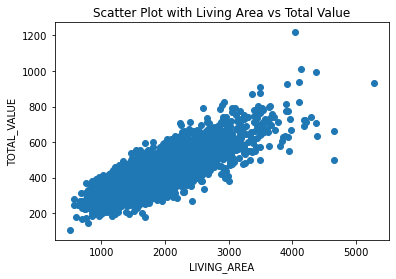

In [22]:
# LIVING_AREA vs. TOTAL_VALUE plot
plt.scatter(homes_df.LIVING_AREA, homes_df.TOTAL_VALUE)
plt.xlabel("LIVING_AREA")
plt.ylabel("TOTAL_VALUE")
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})
plt.title("Scatter Plot with Living Area vs Total Value");

- As the square footage value of the house plot increases, the total value of the property also increases.
- Very few houses have a bigger living area and so very few houses have more property value in the given dataset.
- Most of the houses have their living area space in the range of 1000-3800 square feet.
- Only one of the house is seen to have a living area space of less than 1000 square feet and another one greater than 5000 square feet.
- It is generic that most of the houses in West Roxbury have their living room size between 1000 and 3000 square feet.

## Part 2 : Data preprocessing

#### Dropping predictors (if necessary)

In [23]:
# Correlation
homes_df.loc[:, homes_df.columns != 'TOTAL_VALUE'].corr()

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
LOT_SQFT,1.000000,-0.068903,0.426145,0.073640,0.308398,0.254094,0.201427,0.134947,0.044518,0.181910
YR_BUILT,-0.068903,1.000000,-0.131162,-0.190453,-0.144686,-0.130411,0.073706,0.060685,0.052091,0.087234
LIVING_AREA,0.426145,-0.131162,1.000000,0.475604,0.720688,0.641065,0.438143,0.300847,0.082799,0.261992
FLOORS,0.073640,-0.190453,0.475604,1.000000,0.432856,0.431242,0.112166,0.316142,-0.114602,0.120506
ROOMS,0.308398,-0.144686,0.720688,0.432856,1.000000,0.710693,0.378274,0.282655,0.129223,0.205223
BEDROOMS,0.254094,-0.130411,0.641065,0.431242,0.710693,1.000000,0.332620,0.256852,0.085353,0.164380
FULL_BATH,0.201427,0.073706,0.438143,0.112166,0.378274,0.332620,1.000000,-0.130628,0.146650,0.140160
HALF_BATH,0.134947,0.060685,0.300847,0.316142,0.282655,0.256852,-0.130628,1.000000,-0.020071,0.176234
KITCHEN,0.044518,0.052091,0.082799,-0.114602,0.129223,0.085353,0.146650,-0.020071,1.000000,-0.009562
FIREPLACE,0.181910,0.087234,0.261992,0.120506,0.205223,0.164380,0.140160,0.176234,-0.009562,1.000000


- There is no significant correlation between the predictors to drop
- With basic exploration, we can see all the columns having details which can help us in the modeling process

#### Dealing with NA values

In [24]:
homes_df.isnull().sum()

TOTAL_VALUE    0
LOT_SQFT       1
YR_BUILT       0
LIVING_AREA    2
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

- There are just three records with NaN values in them which is approximately 0.05% of the total record. So, we can drop them.

In [25]:
homes_df_null = homes_df[homes_df.isna().any(axis=1)]
print(homes_df_null)

     TOTAL_VALUE  LOT_SQFT  YR_BUILT  LIVING_AREA  FLOORS  ROOMS  BEDROOMS  \
89         355.1       NaN      1940       1224.0     1.5      7         3   
345        301.1    6271.0      1961          NaN     1.0      8         4   
531        277.6    6750.0      1949          NaN     1.0      4         1   

     FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE REMODEL  
89           2          0        1          1  Recent  
345          2          0        1          1    None  
531          1          0        1          0    None  


In [26]:
homes_df = homes_df.dropna()

In [27]:
# printing number of rows and columns
homes_df.shape

(5799, 12)

#### Dealing with categorical variables

In [29]:
# flag categorical varibales
homes_df = pd.get_dummies(homes_df,drop_first = True)

In [30]:
homes_df.head()

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,1,0,0,0
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,1,0,0,1
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,1,0,0,0
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,1,0,0
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,1,0,0,0


- The categorical variable in the dataset is ‘REMODEL’.
- The categorical variable has 3 levels (None, Recent and Old).
- Out of those, the first level is dropped by the drop_first=True command as there should not be any correlated predictors in linear regression.
- There are 12 columns after flagging the categorical variable.
- The categorical variable column is expanded as REMODEL_Recent and REMODEL_Old.

#### Normalizing the data

- In regression, it is recommended to center and normalize the predictors to standardize the predictions to the same units of regression coefficients.
- Normalization is done to get rid of multicollinearity among coefficients (such as a change in sign and units) and to choose the right model.
- Normalization is done to change the values of numeric columns in a dataset to a common scale, without distorting differences in the range of values.

In [31]:
from sklearn import preprocessing

In [32]:
# creating a dataframe with just the predictors, and another with just the values for the response variable

response_df = homes_df['TOTAL_VALUE'].copy()
predictors_df = homes_df.loc[:, homes_df.columns != 'TOTAL_VALUE'].copy()

In [33]:
# normalizing predictors using standardization (i.e., force all predictors to have mean = 0  and standard deviation = 1)
z_score_normalize = preprocessing.StandardScaler()
predictor_df_normalized = z_score_normalize.fit_transform(predictors_df)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df.columns)
predictor_df_normalized.head(10)

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,1.380770,-1.576306,-0.564957,0.710481,-0.692386,-0.272264,-0.568257,0.722730,-0.124847,-1.309419,-0.333684,-0.421262
1,0.116790,0.229535,0.589695,0.710481,2.090597,0.909517,1.347628,0.722730,-0.124847,-1.309419,-0.333684,2.373818
2,0.457596,-1.298484,-0.529799,0.710481,0.699105,0.909517,-0.568257,0.722730,-0.124847,-1.309419,-0.333684,-0.421262
3,2.806915,0.562921,1.759149,-1.537857,1.394851,2.091298,-0.568257,0.722730,-0.124847,0.460173,-0.333684,-0.421262
4,-0.478685,-0.742841,-0.405822,0.710481,0.003359,-0.272264,1.347628,-1.150811,-0.124847,-1.309419,-0.333684,-0.421262
5,-0.425505,0.368445,-1.105274,-1.537857,-0.692386,-0.272264,-0.568257,-1.150811,-0.124847,0.460173,2.996843,-0.421262
6,-0.478685,0.479574,0.478670,0.710481,0.003359,-0.272264,-0.568257,0.722730,-0.124847,-1.309419,-0.333684,-0.421262
7,1.393878,0.368445,-0.846218,-1.537857,-0.692386,-0.272264,-0.568257,-1.150811,-0.124847,-1.309419,-0.333684,-0.421262
8,0.208546,0.590703,-1.046061,-1.537857,-1.388132,-0.272264,-0.568257,-1.150811,-0.124847,0.460173,-0.333684,2.373818
9,-0.443856,-1.020663,2.469704,0.710481,0.699105,0.909517,1.347628,-1.150811,-0.124847,-1.309419,-0.333684,-0.421262


In [34]:
predictor_df_normalized.describe()

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
count,5.799000e+03,5.799000e+03,5.799000e+03,5.799000e+03,5.799000e+03,5.799000e+03,5.799000e+03,5.799000e+03,5.799000e+03,5.799000e+03,5.799000e+03,5.799000e+03
mean,-1.177422e-18,-1.607114e-15,1.996209e-16,1.690204e-15,-5.619282e-17,1.771513e-15,-3.418047e-15,-1.584121e-15,-5.191618e-16,-1.002004e-14,1.627083e-15,-1.836415e-15
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-1.977860e+00,-5.380677e+01,-2.134098e+00,-1.537857e+00,-2.779624e+00,-2.635827e+00,-5.682572e-01,-1.150811e+00,-1.248467e-01,-1.309419e+00,-3.336845e-01,-4.212623e-01
25%,-5.644487e-01,-4.650194e-01,-6.463745e-01,-1.537857e+00,-6.923865e-01,-2.722641e-01,-5.682572e-01,-1.150811e+00,-1.248467e-01,-1.309419e+00,-3.336845e-01,-4.212623e-01
50%,-2.228931e-01,-4.828701e-02,-2.004274e-01,7.104812e-01,3.359352e-03,-2.722641e-01,-5.682572e-01,7.227300e-01,-1.248467e-01,4.601735e-01,-3.336845e-01,-4.212623e-01
75%,2.808265e-01,5.073562e-01,4.009534e-01,7.104812e-01,6.991052e-01,9.095171e-01,1.347628e+00,7.227300e-01,-1.248467e-01,4.601735e-01,-3.336845e-01,-4.212623e-01
max,1.503026e+01,2.063157e+00,6.720078e+00,2.958820e+00,4.873580e+00,6.818423e+00,7.095285e+00,4.469812e+00,8.009825e+00,5.768952e+00,2.996843e+00,2.373818e+00


- The Standard deviation is 1 for all columns after Z-score normalization.
- The Mean is almost 0 (e-14 to e-18)

In [35]:
predictor_df_normalized.shape

(5799, 12)

## Part 3: Multiple Linear Regression

### 3.1: Train and Test multiple linear regression model with sklearn

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from dmba import regressionSummary, adjusted_r2_score  # using the dmba package for perforance evaluation

no display found. Using non-interactive Agg backend


In [37]:
# partition data into train and test sets, we are holding 30% of the data for testing
X = predictor_df_normalized
y = response_df
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
# train the LR model
linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_y)

In [39]:
# printing the coefficients
print('intercept', linear_model.intercept_)
print(pd.DataFrame({'Predictor':X.columns, 'coefficient': linear_model.coef_}))

intercept 392.7177854344719
         Predictor  coefficient
0         LOT_SQFT    23.816638
1         YR_BUILT    -0.074815
2      LIVING_AREA    52.189564
3           FLOORS    12.691033
4            ROOMS     2.521823
5         BEDROOMS    -0.241315
6        FULL_BATH     9.961379
7        HALF_BATH    10.341500
8          KITCHEN    -4.124398
9        FIREPLACE    11.332082
10     REMODEL_Old     2.719823
11  REMODEL_Recent     9.762506


#### Performance metrics on training set

In [40]:
# printing performance metrics on training set using regressionSummary()
predicted_y_training = linear_model.predict(train_X)
regressionSummary(train_y, predicted_y_training)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.0222
            Mean Absolute Error (MAE) : 33.3665
          Mean Percentage Error (MPE) : -1.1660
Mean Absolute Percentage Error (MAPE) : 8.6980


In [41]:
print(adjusted_r2_score(train_y, predicted_y_training, linear_model))

0.7939987588204693


#### Performance metrics on test set

In [43]:
# Deploying the model on the test data
predicted_y_test = linear_model.predict(test_X) 

In [44]:
# Using regressionSummary()
regressionSummary(test_y, predicted_y_test)


Regression statistics

                      Mean Error (ME) : 0.0335
       Root Mean Squared Error (RMSE) : 44.8031
            Mean Absolute Error (MAE) : 33.6772
          Mean Percentage Error (MPE) : -1.3231
Mean Absolute Percentage Error (MAPE) : 8.8396


How did the Model perform ?
- The performance can be measured using the percentage of accuracy observed in both training and test datasets to conclude the presence of overfitting.
- If the model performs better in the training set than in the test set, the model is likely to be overfitting.
- The validation metrics usually increase until a point where they stagnate or start declining when the model is affected by overfitting.
- In the given model built using sklearn, the performance metrics of training and test data remain the same with a negligible difference (~0.007%). The model is not overfitted as there is no difference with performance metrics in training and test data.

In [59]:
result = pd.DataFrame({'Predicted': predicted_y_test, 'Actual': test_y,
                       'Residual': test_y - predicted_y_test})
result.head()

,Predicted,Actual,Residual
0,326.948924,291.7,-35.248924
1,377.324591,361.1,-16.224591
2,384.895749,371.6,-13.295749
3,279.831242,215.5,-64.331242
4,369.442969,325.7,-43.742969


/var/folders/ld/cklp9y613tndhgzmfwb4bw0c0000gn/T/ipykernel_72800/453326233.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


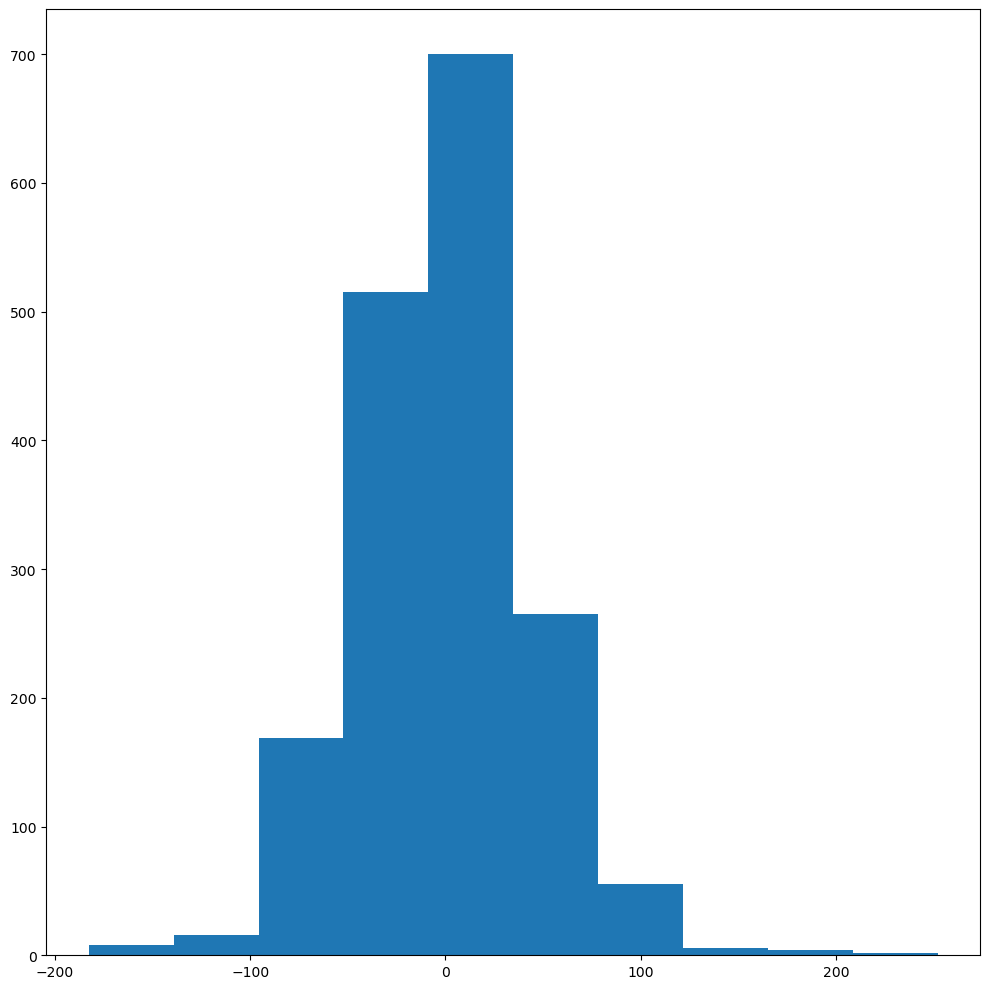

In [45]:
# Checking if the residuals are normally distributed
residuals = test_y - predicted_y_test

plt.hist(residuals)
plt.tight_layout()
plt.show()

- Based on the above histogram, the residuals are normally distributed. The residuals are distributed around zero for the entire range of predicted values and are evenly scattered.
- It can be interpreted as a well-performing model as the residuals are in the normal distribution.

### 3.2 : Train and Test model with statsmodels

In [46]:
import statsmodels.api as sm

In [47]:
train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)

train_y = train_y.reset_index(drop=True)
test_y = test_y.reset_index(drop=True)

In [48]:
# adding constant to the training and testing data (the predictors) and train model
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

linear_model2 = sm.OLS(train_y, train_X).fit()

In [49]:
# printing the coefficients
linear_model2.params

const             392.717785
LOT_SQFT           23.816638
YR_BUILT           -0.074815
LIVING_AREA        52.189564
FLOORS             12.691033
ROOMS               2.521823
BEDROOMS           -0.241315
FULL_BATH           9.961379
HALF_BATH          10.341500
KITCHEN            -4.124398
FIREPLACE          11.332082
REMODEL_Old         2.719823
REMODEL_Recent      9.762506
dtype: float64

#### Training performance

In [50]:
predicted_y_training2 = linear_model2.predict(train_X)
regressionSummary(train_y, predicted_y_training2)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 44.0222
            Mean Absolute Error (MAE) : 33.3665
          Mean Percentage Error (MPE) : -1.1660
Mean Absolute Percentage Error (MAPE) : 8.6980


In [51]:
# now, deploy the model on the test data
predicted_y_test2 = linear_model2.predict(test_X)

#### Testing performance

In [52]:
regressionSummary(test_y, predicted_y_test2)


Regression statistics

                      Mean Error (ME) : 0.0335
       Root Mean Squared Error (RMSE) : 44.8031
            Mean Absolute Error (MAE) : 33.6772
          Mean Percentage Error (MPE) : -1.3231
Mean Absolute Percentage Error (MAPE) : 8.8396


- The model built using statsmodel reports the similar performance metrics for both training and testing as on sklearn model. Usually, RMSE penalizes large errors, and other metrics do not penalize large errors.

In [53]:
# print p-values for each predictor
linear_model2.pvalues.round(4)

const             0.0000
LOT_SQFT          0.0000
YR_BUILT          0.9105
LIVING_AREA       0.0000
FLOORS            0.0000
ROOMS             0.0304
BEDROOMS          0.8164
FULL_BATH         0.0000
HALF_BATH         0.0000
KITCHEN           0.0000
FIREPLACE         0.0000
REMODEL_Old       0.0001
REMODEL_Recent    0.0000
dtype: float64

In [54]:
# dropping the variables that are not significant (i.e., p>0.05)
train_X = train_X.drop(["YR_BUILT","BEDROOMS"], axis = 1)
test_X = test_X.drop(["YR_BUILT","BEDROOMS"], axis = 1)

- Dropping ‘YR_BUILT’ and ‘BEDROOMS’ predictors from the model.
- The p-value of the ‘YR_BUILT’ and ‘BEDROOMS’ predictors are 0.9105 and 0.8164, respectively.
- These p-values are greater than 0.05, which portrays as a least significant predictor to help with the target value and indicates a confidence level of less than 90%.

In [55]:
# training the new model and printing the performance metrics for training
linear_model3 = sm.OLS(train_y, train_X).fit()
linear_model3.params

const             392.718539
LOT_SQFT           23.821805
LIVING_AREA        52.140918
FLOORS             12.677210
ROOMS               2.418821
FULL_BATH           9.934721
HALF_BATH          10.320736
KITCHEN            -4.132159
FIREPLACE          11.324488
REMODEL_Old         2.720619
REMODEL_Recent      9.772108
dtype: float64

In [56]:
# printing the performance metrics for training
predicted_y_training3 = linear_model3.predict(train_X)
regressionSummary(train_y, predicted_y_training3)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 44.0226
            Mean Absolute Error (MAE) : 33.3690
          Mean Percentage Error (MPE) : -1.1661
Mean Absolute Percentage Error (MAPE) : 8.6991


In [57]:
# deploying the model on the test data, and printing the performance metrics for testing
predicted_y_test3 = linear_model3.predict(test_X)
regressionSummary(test_y, predicted_y_test3)


Regression statistics

                      Mean Error (ME) : 0.0310
       Root Mean Squared Error (RMSE) : 44.8052
            Mean Absolute Error (MAE) : 33.6777
          Mean Percentage Error (MPE) : -1.3238
Mean Absolute Percentage Error (MAPE) : 8.8400


- Even after dropping the least significant predictors, the performance metrics of the updated model match the performance of the preliminary model.
- RMSE is concerned with deviations from the true value.
- If the predicted and actual values differ, the value of RMSE is large.
- Whereas the predicted and actual values are close, RMSE is small.
- Similarly, all the performance metrics are compared with training and test data. For the given dataset, the model seems to be normal and can be implemented for the final assessment of total value of the property.